## Конспект

![image.png](
  
)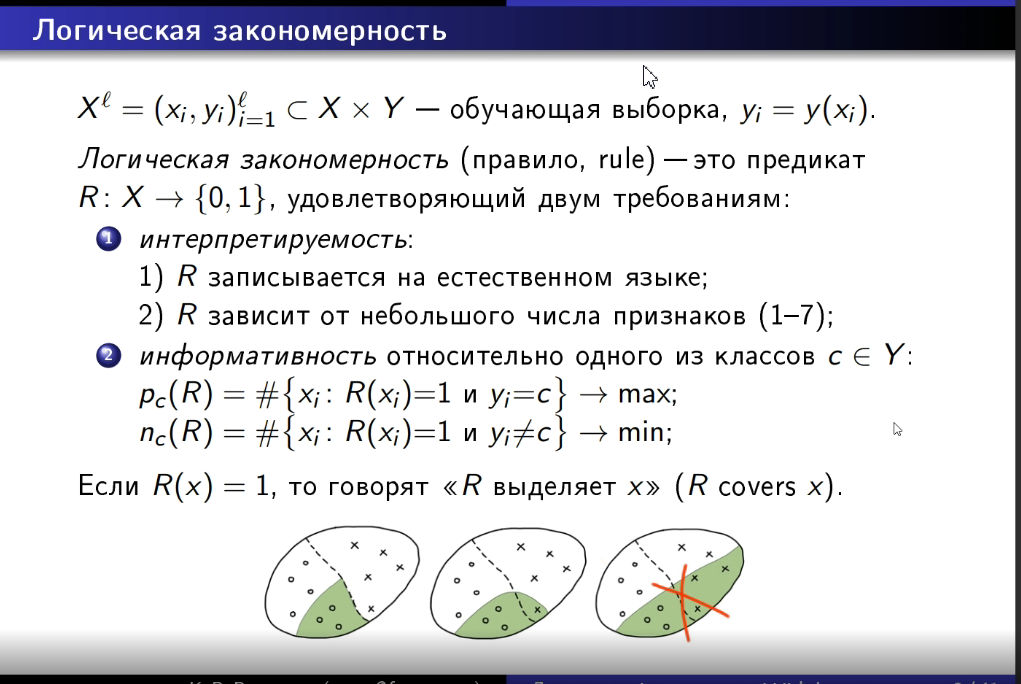

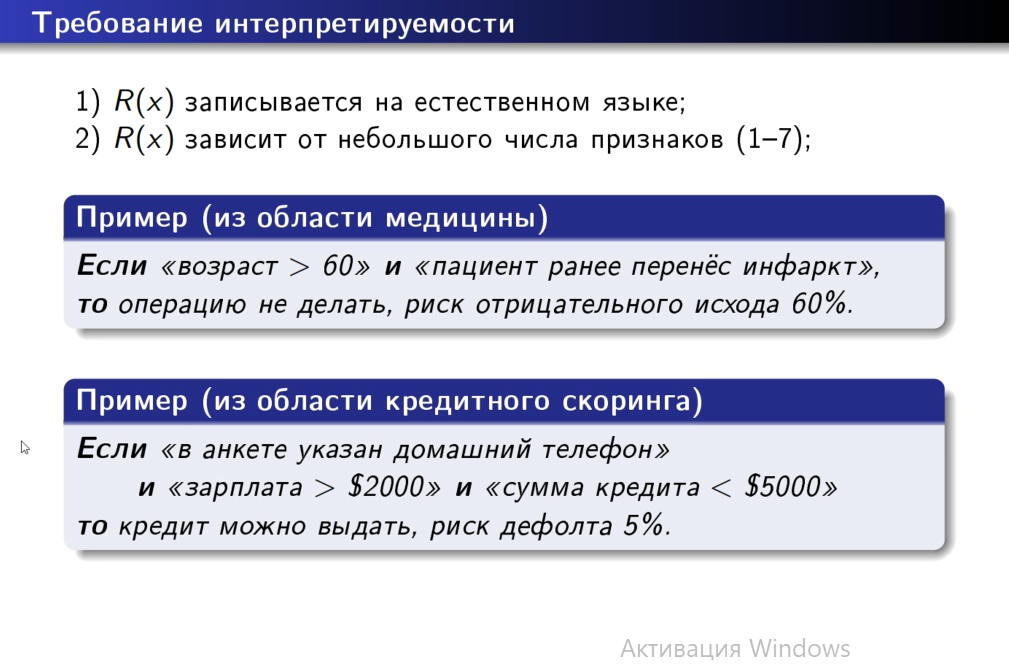

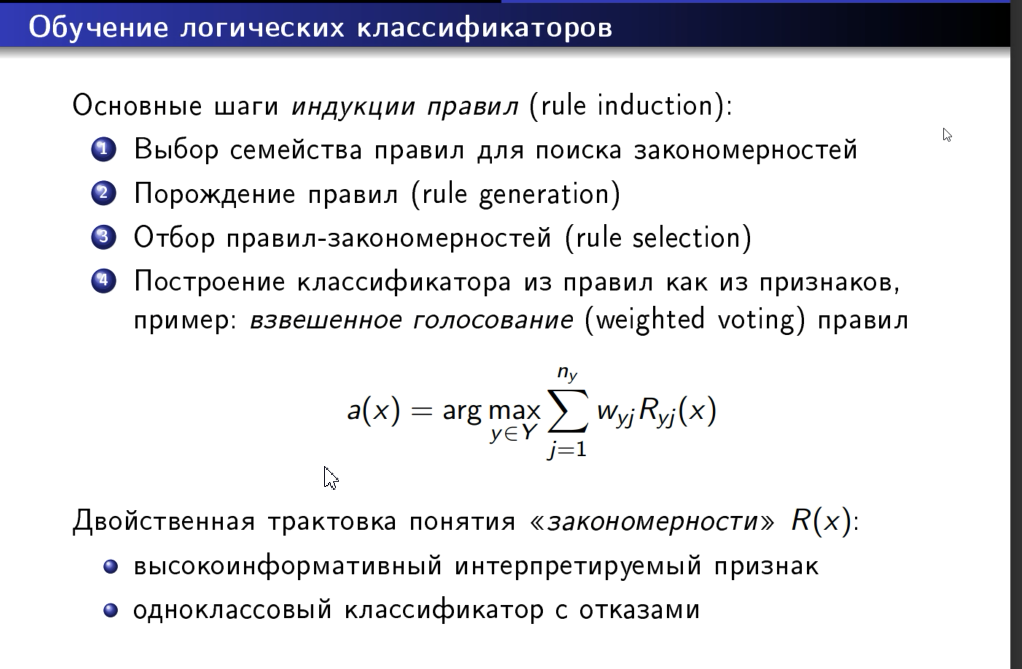

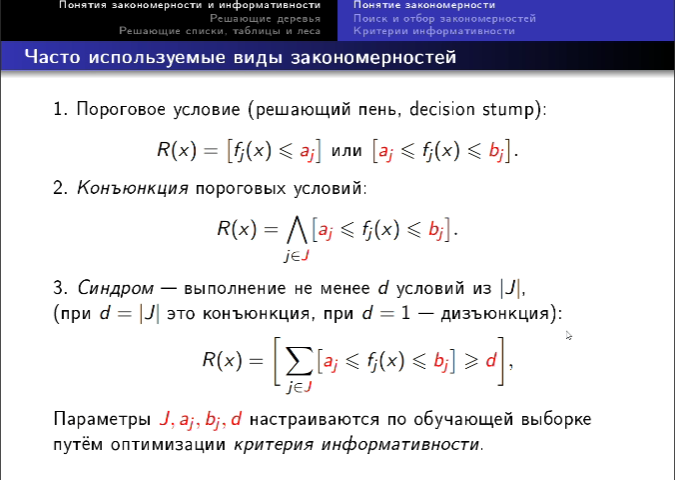

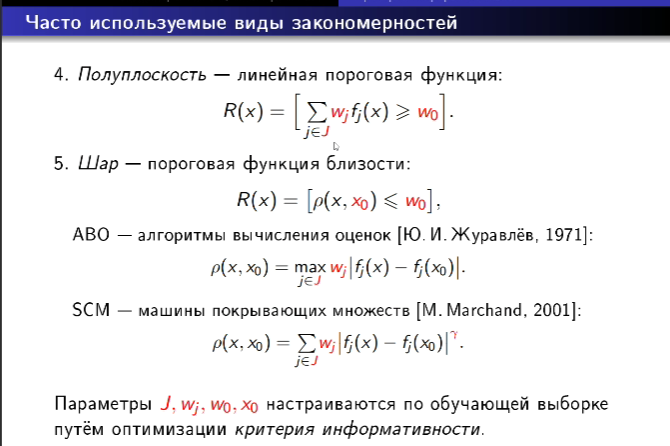

ПОЛЕЗНО:
> http://www.machinelearning.ru/wiki/index.php?title=Алгоритмы_вычисления_оценок
> https://ru.wikipedia.org/wiki/Задача_о_покрытии_множества



Порождение правил





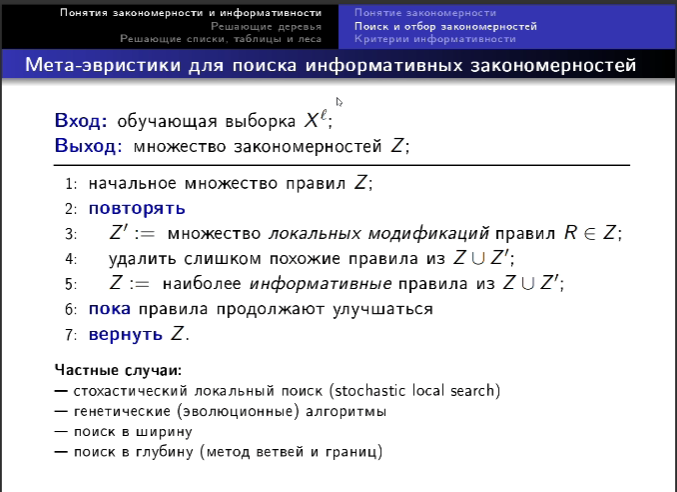


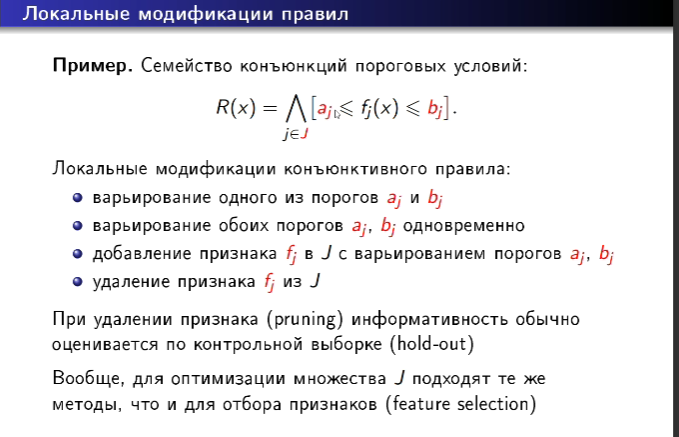

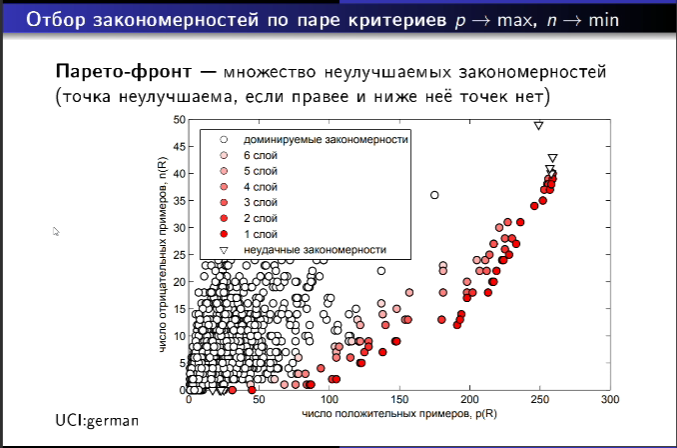

[Парето фронт](https://translated.turbopages.org/proxy_u/en-ru.ru.30d6a068-640316ec-72a701ee-74722d776562/https/en.wikipedia.org/wiki/Pareto_front)


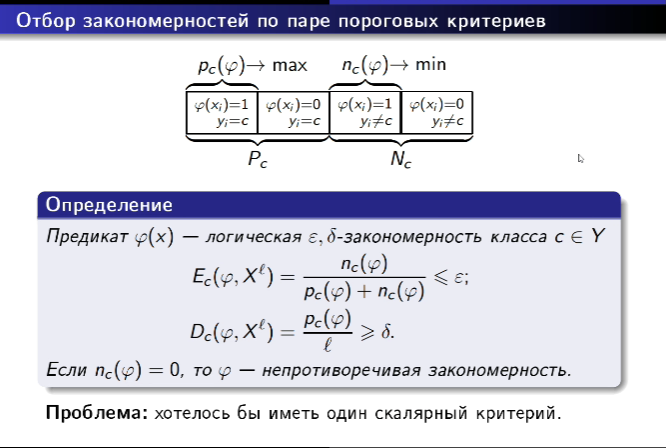

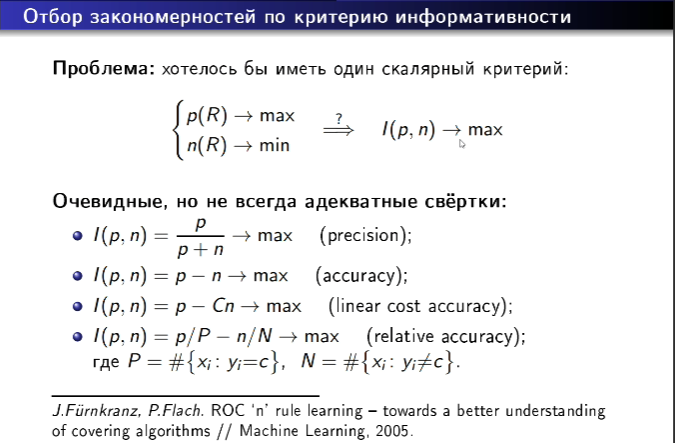

[Точность и полнота](https://habr.com/ru/post/661119/)

![image.png](*dQg1XYrHNurNd1nkI*/mhpcW/ReTz/wqD0C3qacnGIUogn1ledQAyWPKRRj8yor+mvOaccV+V93QRAEIRIQg1QQBGHGUYy9W3PRX3N4ilHqqDyEwzX9yN26172xoGFH+bpcoKWCpeVA5fHJ4zn0jCTPSWbAilZUsbLVf/5of2Z/t+FMaXHZZCClr3id6o7g4MFDqOwA7FlpgEugpUflBAwM2WIszWtFTQ30jUlT5azHuZp+IG+9spzUPZMBmjwZYZO0trQqgZVYEb2u81T6a75CZcejfx4FTqL2CHibupYexYVATY1x/VyuLn8Rq6ytqPi83seyCYIgCJGILNkVBEGYiZTsxYGSehw5eBgHXTbUWR8f8eFNWvZKHPqYpeXPWY855di/tRsHz7im9+aqKhyu6YOjA4Be+XLKsf+AXakTW7KZsxdvdh7C4TMHcfDMo29XvYltPYdR0fIoSI+SZHFRLip6M/QNQxPldDR4Pzv6eF9qDQ4fnLrbsebjQwBfhurO8C/xvs4quasK0fTxwUf7LpUlsD6k77ZNFezLC2Gt6VZmoQ2vRvm6XNScqcCRumLsDUDdBUEQhPBjcTqdTk8X9fT0ID09PRTlEQRBEIQZTf3nB1EBA4O+oxKHPm5C4ZQAPkHA4IxYQRAEQQglsmRXEARBEARBEARBCAuyZFcQBEEQQkjxngPG+3f52ZqCIAiCMAuQJbuCIAiCIAiCIAhCWJAlu4IgCIIgCIIgCEJYEINUEARBEARBEARBCAum95D29PQEsxyCIAiCIAiCIAjCLMPUHlJBEARBEARBEARBCDSyZFcQBEEQBEEQBEEIC2KQCoIgCIIgCIIgCGFBDFJBEARBEARBEAQhLIhBKgiCIAiCIAiCIISF/weN1Lzru0o8igAAAABJRU5ErkJggg==)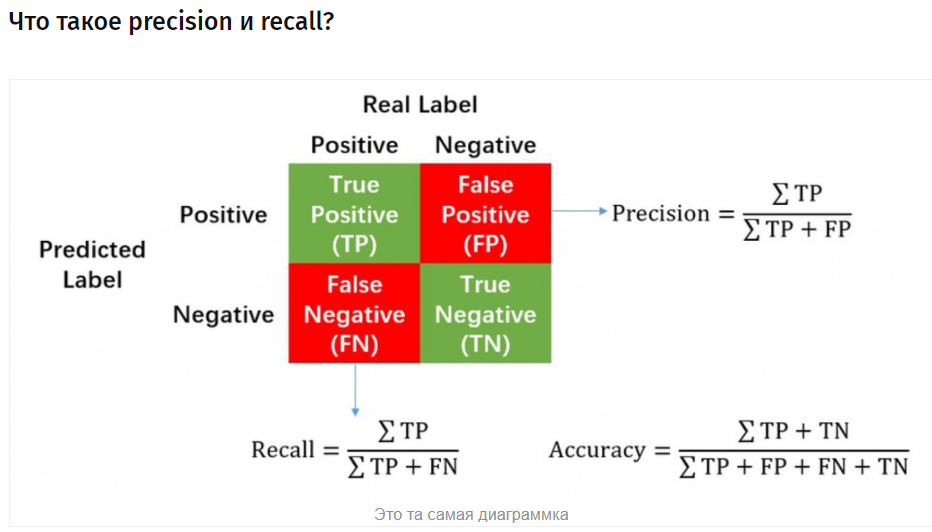

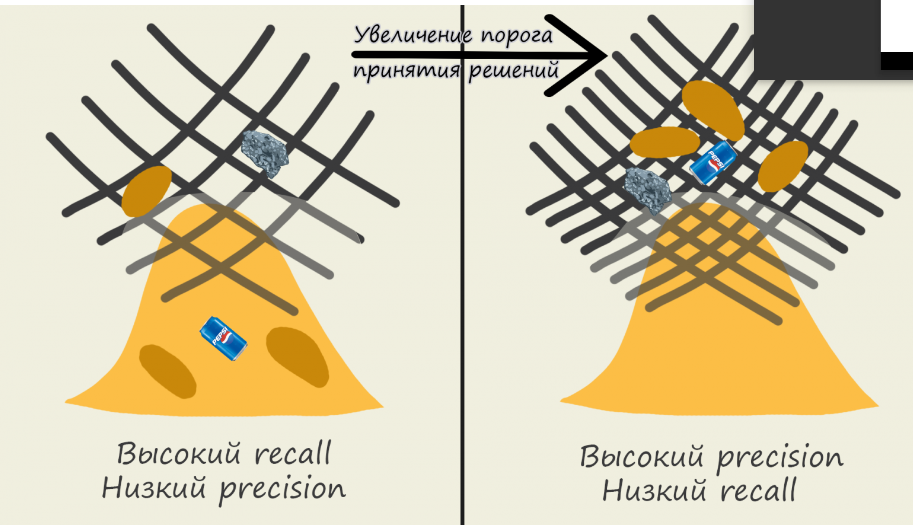

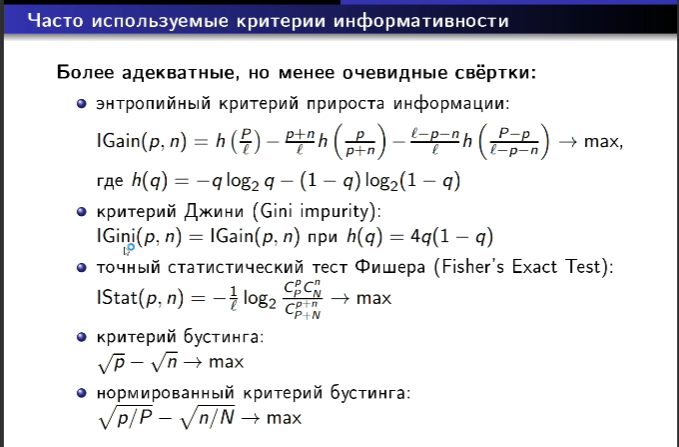

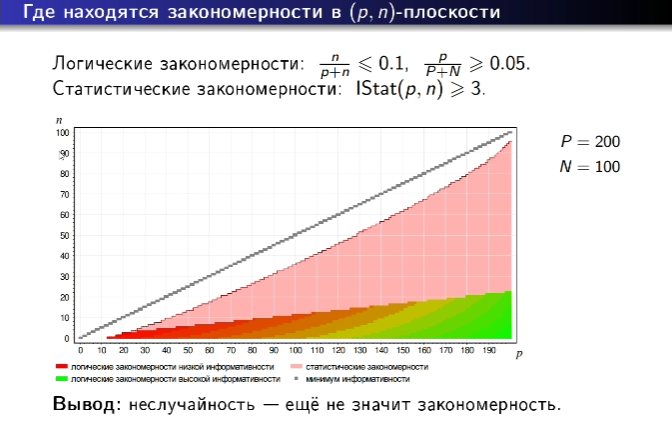

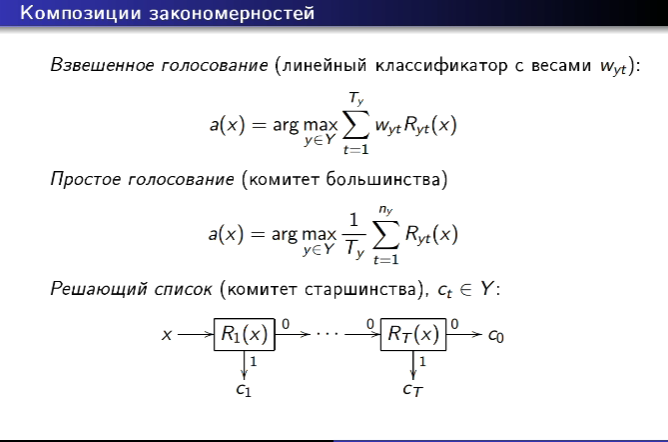

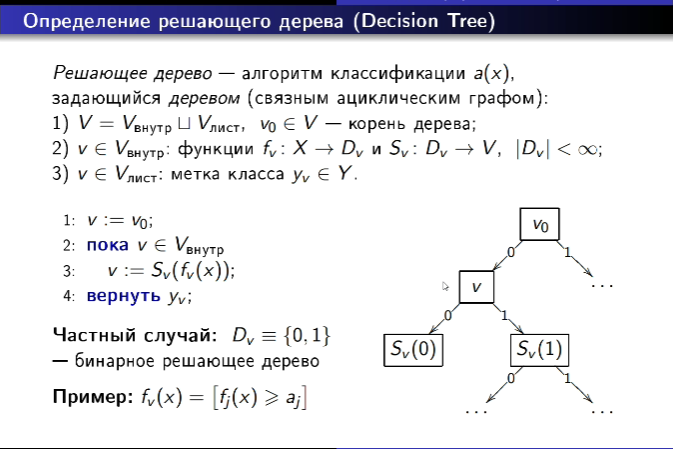

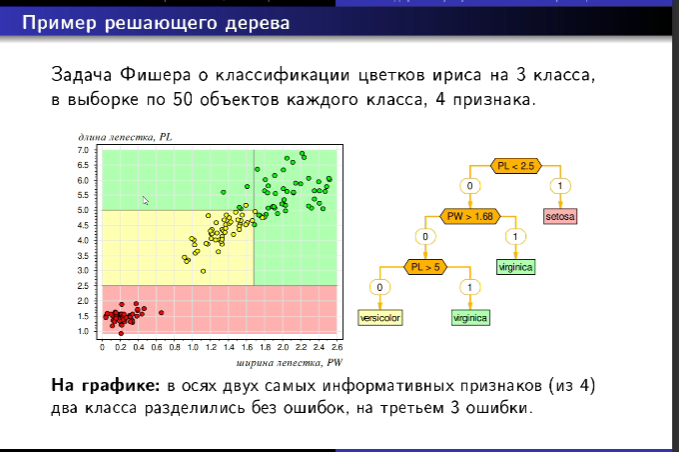

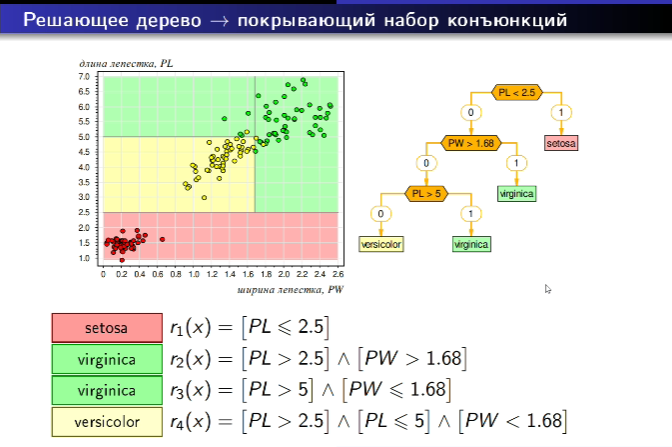

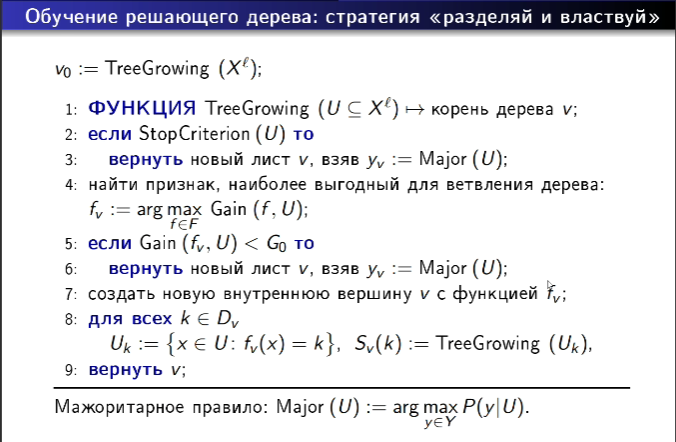

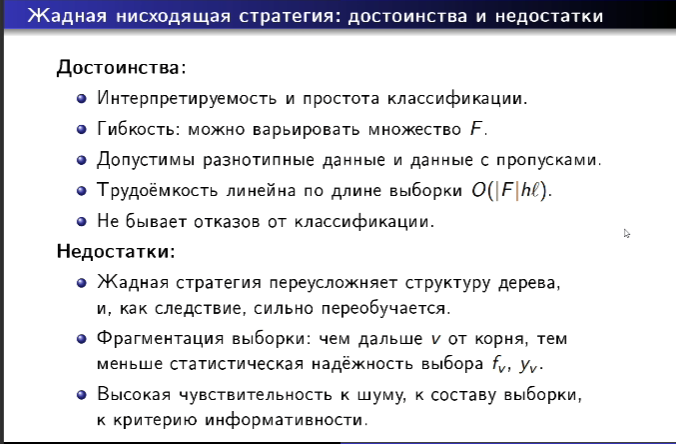

IDT - [Iterative Desicion Trees](https://scikit-learn.org/stable/modules/tree.html)


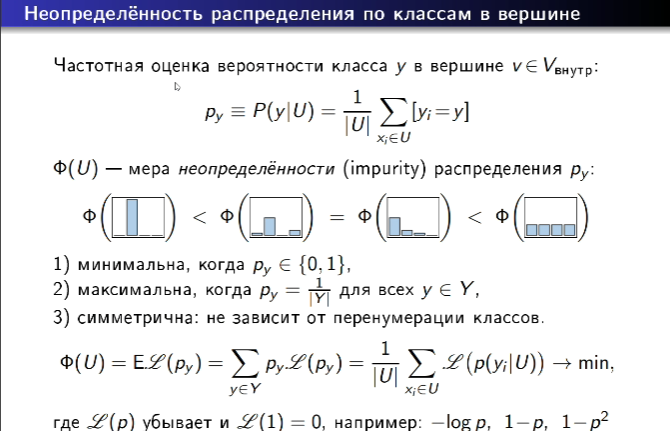

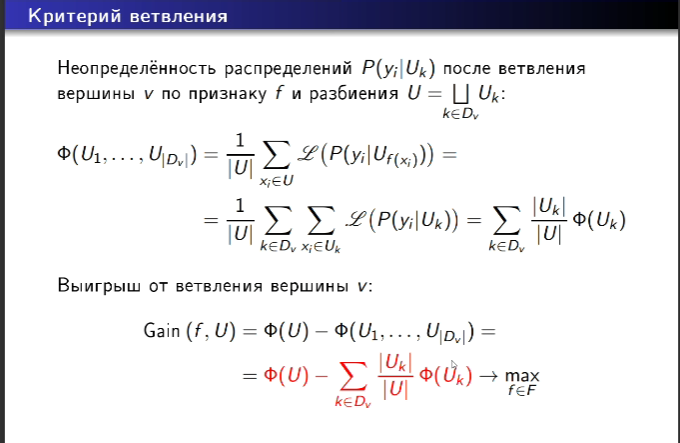

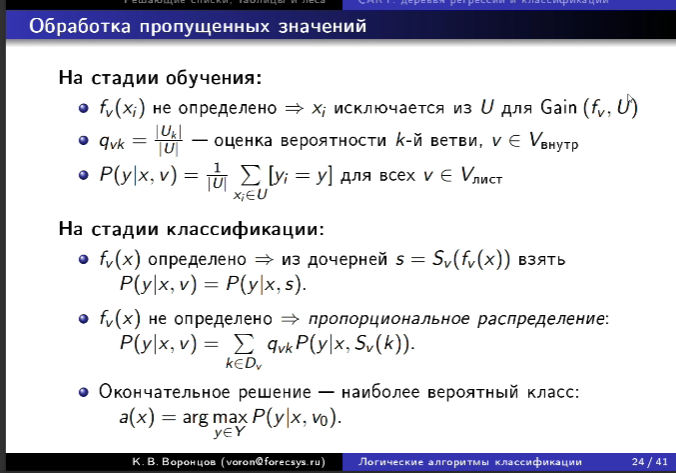

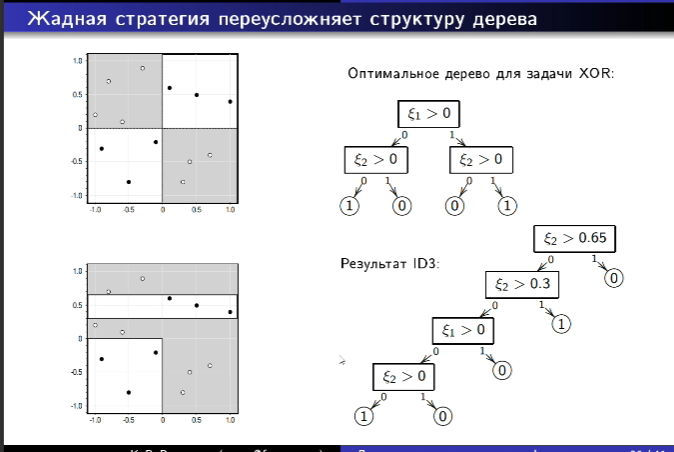

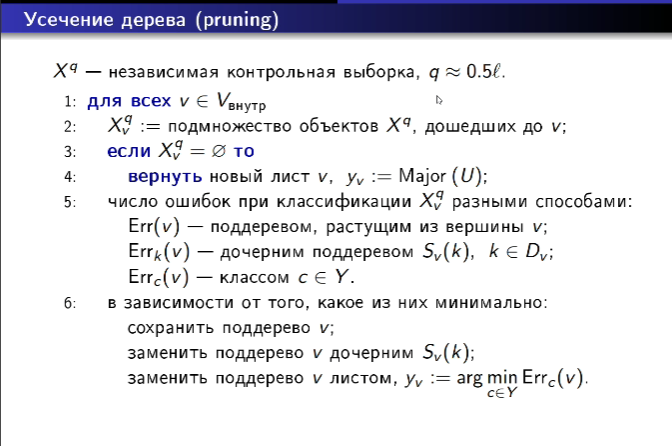

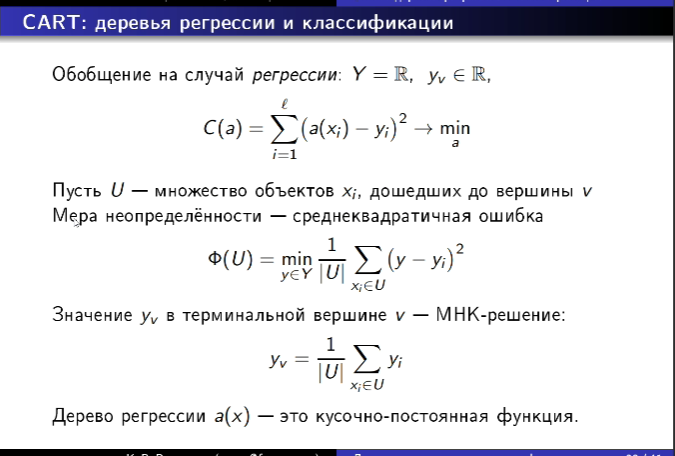

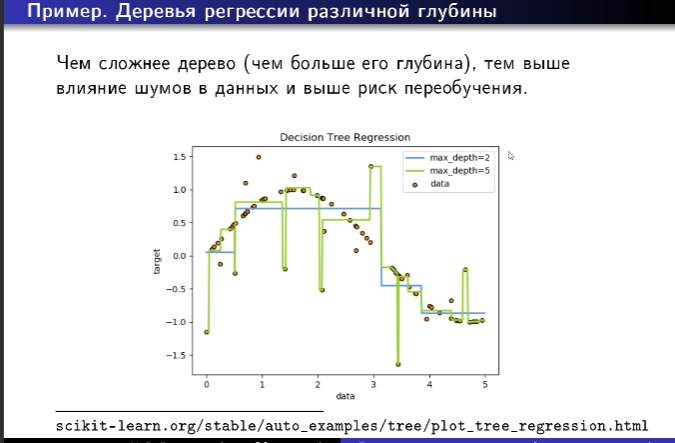

HOMEWORK
1. SKLEARN повторить примеры, проанализировать
2. Метрики в задачах машинного обучения 
3. (см ниже) Читать [статью](https://habr.com/ru/company/ods/blog/322534/), повторить методы 

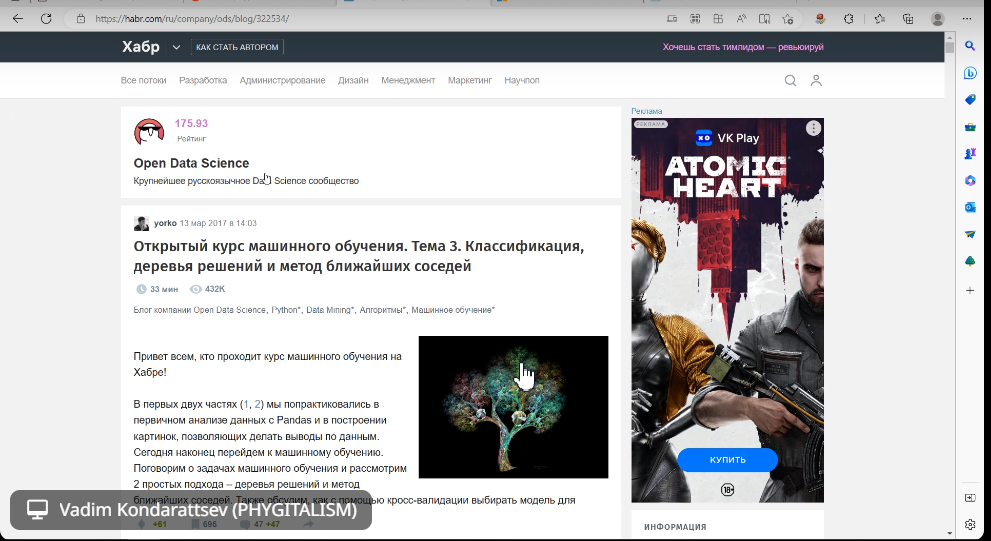

## Практика


3. Примеры из статьи


In [ ]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
def build(L):
    # create node t
    if the stopping criterion is True:
        assign a predictive model to t
    else:
        Find the best binary split L = L_left + L_right
        t.left = build(L_left)
        t.right = build(L_right)
    return t  

SyntaxError: ignored

<ipython-input-4-ae9022837163>:5: RuntimeWarning: divide by zero encountered in log2
  plt.plot(xx, [-x * np.log2(x) - (1-x) * np.log2(1 - x)  for x in xx], label='entropy')
<ipython-input-4-ae9022837163>:5: RuntimeWarning: invalid value encountered in double_scalars
  plt.plot(xx, [-x * np.log2(x) - (1-x) * np.log2(1 - x)  for x in xx], label='entropy')


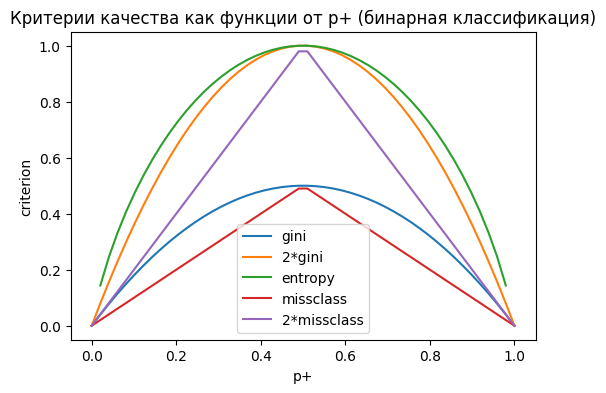

In [ ]:
plt.rcParams['figure.figsize'] = (6,4)
xx = np.linspace(0,1,50)
plt.plot(xx, [2 * x * (1-x) for x in xx], label='gini')
plt.plot(xx, [4 * x * (1-x) for x in xx], label='2*gini')
plt.plot(xx, [-x * np.log2(x) - (1-x) * np.log2(1 - x)  for x in xx], label='entropy')
plt.plot(xx, [1 - max(x, 1-x) for x in xx], label='missclass')
plt.plot(xx, [2 - 2 * max(x, 1-x) for x in xx], label='2*missclass')
plt.xlabel('p+')
plt.ylabel('criterion')
plt.title('Критерии качества как функции от p+ (бинарная классификация)')
plt.legend();

In [ ]:
# первый класс
np.random.seed(7)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

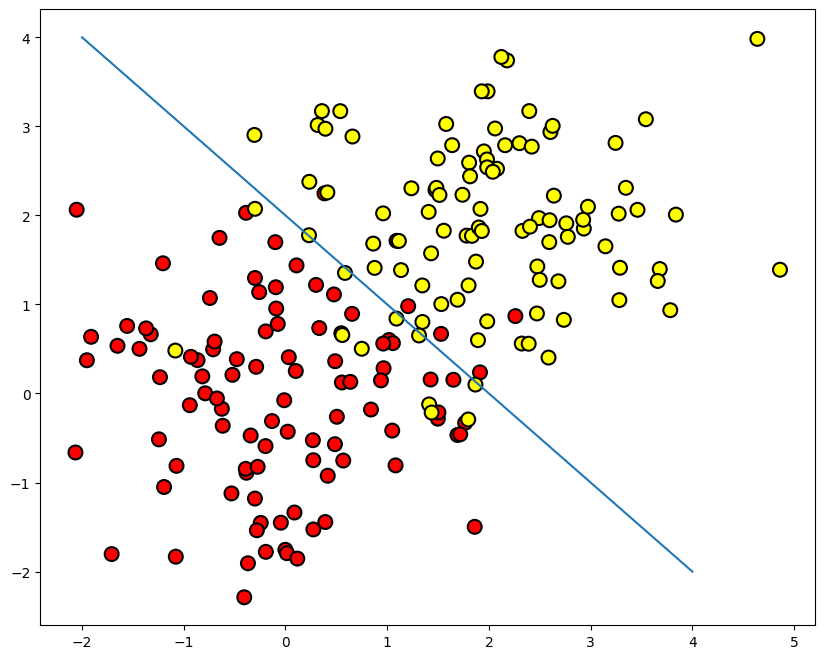

In [ ]:
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

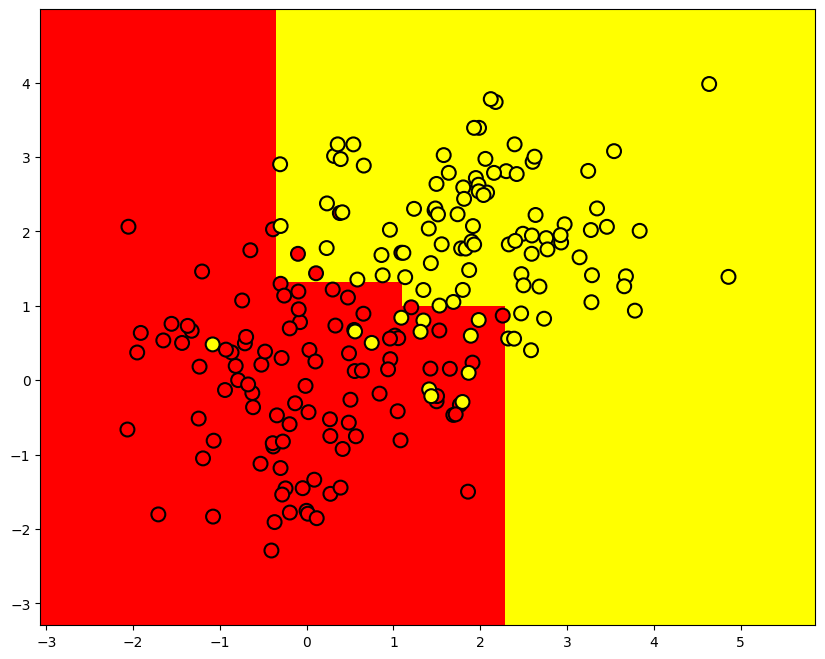

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# параметр min_samples_leaf указывает, при каком минимальном количестве
# элементов в узле он будет дальше разделяться
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

# обучаем дерево
clf_tree.fit(train_data, train_labels)

# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);

In [ ]:
# используем .dot формат для визуализации дерева
from sklearn.tree import export_graphviz
export_graphviz(clf_tree, feature_names=['x1', 'x2'], 
out_file='../../img/small_tree.dot', filled=True)
# для этого понадобится библиотека pydot (pip install pydot)
!dot -Tpng '../../img/small_tree.dot' -o '../../img/small_tree.png'

FileNotFoundError: ignored

In [ ]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(data['Возраст'].values.reshape(-1, 1), data['Невозврат кредита'].values)

export_graphviz(age_tree, feature_names=['Возраст'], 
out_file='../../img/age_tree.dot', filled=True)
!dot -Tpng '../../img/age_tree.dot' -o '../../img/age_tree.png'

NameError: ignored

In [ ]:
age_sal_tree = DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(data2[['Возраст', 'Зарплата']].values, data2['Невозврат кредита'].values);

export_graphviz(age_sal_tree, feature_names=['Возраст', 'Зарплата'], 
out_file='../../img/age_sal_tree.dot', filled=True)
!dot -Tpng '../../img/age_sal_tree.dot' -o '../../img/age_sal_tree.png'

Пример первый 


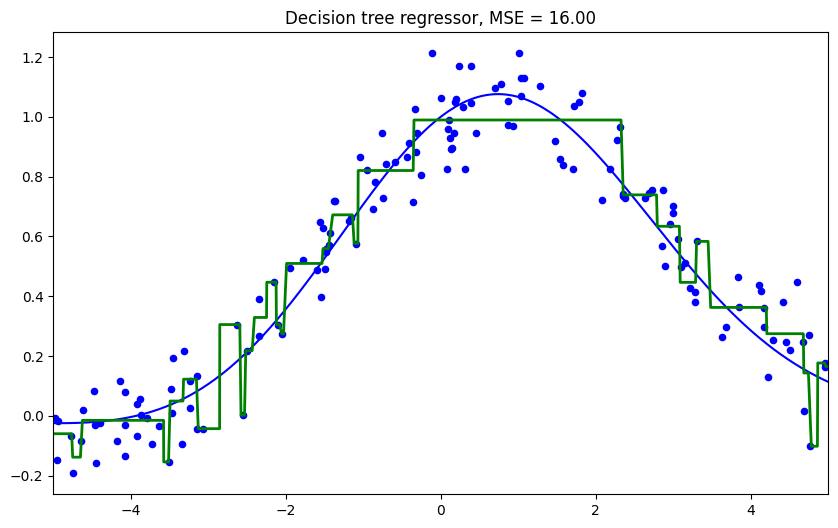

In [ ]:
n_train = 150        
n_test = 1000       
noise = 0.1

def f(x, alpha=0.1,beta=0.2):
    x = x.ravel()
    return np.exp(-alpha * x ** 2) * (np.sin(beta*x) + np.cos(beta*x))

def generate(n_samples, noise):
    alpha=0.1
    beta=0.2
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-alpha * X ** 2) * (np.sin(beta*X) + np.cos(beta*X)) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

Метод ближайших соседей

In [ ]:
df = pd.read_csv('/content/telecom_churn.csv')

df['International plan'] = pd.factorize(df['International plan'])[0]
df['Voice mail plan'] = pd.factorize(df['Voice mail plan'])[0]
df['Churn'] = df['Churn'].astype('int')
states = df['State']
y = df['Churn']
df.drop(['State', 'Churn'], axis=1, inplace=True)